# **K-means Clustering**

### Analyze the clusters and common properties found for each cluster with dataset at 
[Kaggle: moltean/fruits](https://www.kaggle.com/moltean/fruits)

**Abhishek Kumar**

**AI Tech System**

[AITS](www.ai-techsystems.com)

**Assignment 3**

In [0]:
#Uploading kaggle.json from kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulti72","key":"48282a59b3c253605adb3ce5aa7ad10a"}'}

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#Downloading dataset from kaggle.
!kaggle datasets download -d moltean/fruits 

 99% 708M/714M [00:07<00:00, 114MB/s] 
100% 714M/714M [00:07<00:00, 100MB/s]


In [0]:
# Unzip the data
!unzip fruits.zip

In [0]:
#importing modules
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [0]:
#Storing path of images from training and test folder
name=[]

import os
      
#Including only 150 images (100 from training folder and 50 from test folder) of each type as many images are similar, and it will also decrease the training time
for dirname, _, filenames in os.walk('/content/fruits-360/Training'):
    count=0
    for filename in filenames:
        name.append(os.path.join(dirname,filename))
        count+=1
        if count==100:
          break
        

for dirname, _, filenames in os.walk('/content/fruits-360/Test'):
    count=0
    for filename in filenames:
        name.append(os.path.join(dirname,filename))
        count+=1
        if count==50:
          break
   

In [0]:
#Shuffuling so that images will be mixed
import random
random.shuffle(name)

len(name)

17249

In [0]:
# Display two images two compare original image and processed image
def display(a, b, title1 = "Original", title2 = "Processed"):
    a= cv2.imread(a)
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()



In [0]:
# Preprocessing Method for removing noise
train=[]
def processing(data):
    
    #reading image
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(img)):
        blur = cv2.GaussianBlur(img[i], (5, 5), 0)
        no_noise.append(blur)
        image = no_noise[i]
        train.append(image)

In [0]:
#Preprocessing and putting data into np array...
processing(name)
train = np.array(train)

In [0]:
#17249 training data with 100x100 resolution and 3 is RGB values for each pixel
train.shape

(17249, 100, 100, 3)

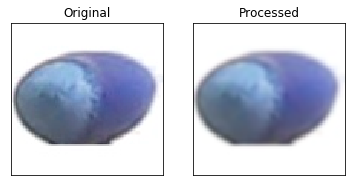

In [0]:
#Original data vs Processed data
display(name[1430],train[1430])


In [0]:
n,x,y,c = train.shape #n=17249 (no. of images) x=y=100 image dimension and c=3 RGB values for each pixel


In [0]:
#Reshaping data: Unrolling pixels: so each image  is represented by a row
flat_train = train.reshape(n,x*y*c)
flat_train.shape
#17249 images with 30000 features

(17249, 30000)

In [0]:
%matplotlib inline
import seaborn as sns;
from scipy import ndimage
from sklearn.cluster import KMeans


In [0]:
#Applying Kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(flat_train)
centers = kmeans.cluster_centers_

In [0]:
print(centers.shape)
print(clusters.shape)

(10, 30000)
(17249,)


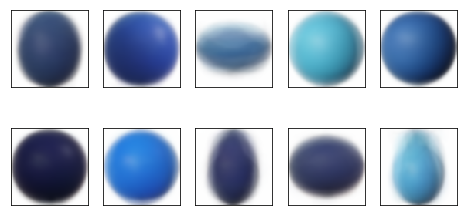

In [0]:
#visualize centers
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
centers = kmeans.cluster_centers_.reshape(10, 100, 100,3)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow((center).astype(np.uint8), interpolation='nearest')

There are 1787 members in cluster 1


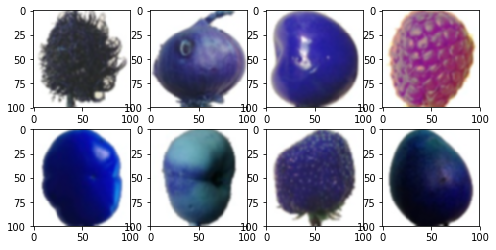



There are 1939 members in cluster 2


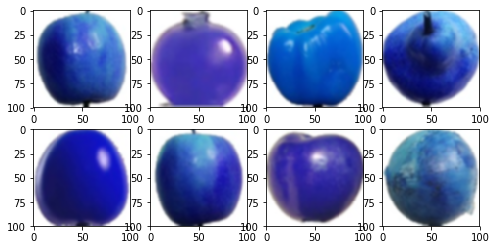



There are 1303 members in cluster 3


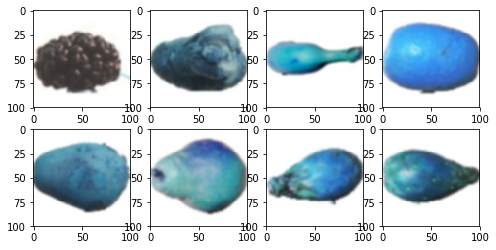



There are 2211 members in cluster 4


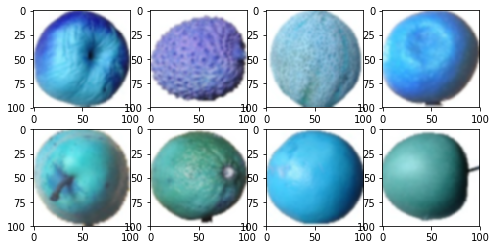



There are 1973 members in cluster 5


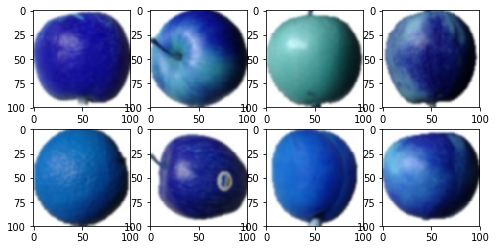



There are 2052 members in cluster 6


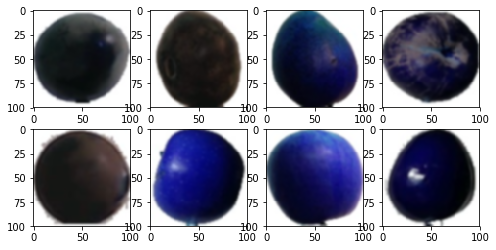



There are 1789 members in cluster 7


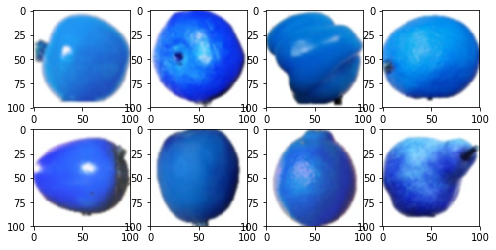



There are 1140 members in cluster 8


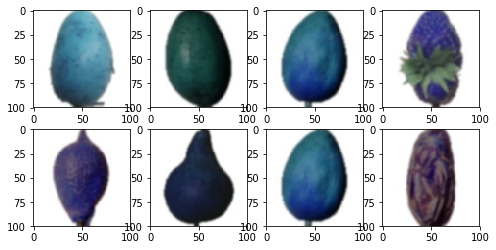



There are 2211 members in cluster 9


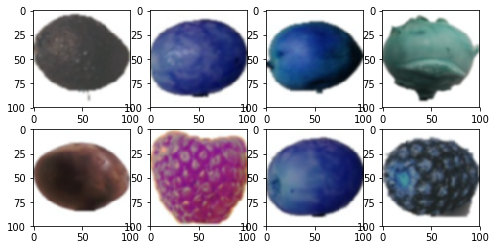



There are 844 members in cluster 10


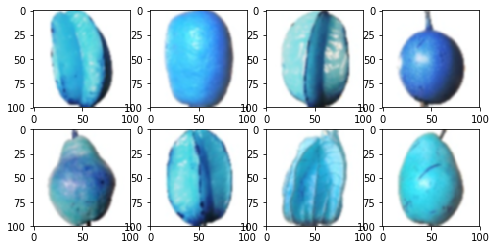

In [0]:
#visualize  members of each clusters
import matplotlib.pyplot as plt
n_clusters=10  
for cluster in np.arange(n_clusters):

    cluster_member_indices = np.where(clusters == cluster)[0]
    print("There are %s members in cluster %s" % (len(cluster_member_indices), cluster+1))
    fig = plt.figure(figsize=(8,4))
    columns = 4
    rows = 2
    for i in range(1, columns*rows +1):
      random_member = random.choice(cluster_member_indices)
      fig.add_subplot(rows, columns, i)
      plt.imshow(train[random_member,:,:,:])
    plt.show()
    print()
    print()

# **CONCLUSION**:

## We can further improve the clustering:
  

*   Choosing optimal value of K(number of clusters):
*   Merging neighboring clusters if the resulting cluster's variance is below the threshold


*   Running the algorithm using different initializations of centroids. 
*   Standardize the data



